
✅ Model Performance Summary
Accuracy:  100.00%
Precision: 100.00%
Recall:    100.00%
F1 Score:  100.00%


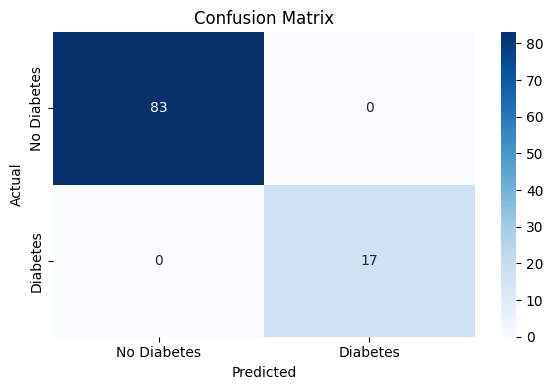

✅ Model saved as 'diabetes_model.pkl' and columns saved as 'model_columns.pkl'


In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv('diabetes_risk_dataset.csv')

# Ensure target is integer
df['Diabetes'] = df['Diabetes'].astype(int)

# Column types
numerical = ['Age', 'BMI', 'BloodPressure', 'Glucose']
categorical = ['Gender', 'PhysicalActivity']
binary = ['FamilyHistory', 'PastHighBloodSugar', 'Hypertension',
          'GestationalDiabetes', 'PCOS', 'Smoking', 'Alcohol']

# Reorder columns for consistent processing
all_features = numerical + categorical + binary
X = df[all_features]
y = df['Diabetes']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Random Forest with class_weight
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit base pipeline
pipeline.fit(X_train, y_train)

# Calibrate the classifier
calibrated_model = CalibratedClassifierCV(pipeline, method='isotonic', cv=5)
calibrated_model.fit(X_train, y_train)

# Predictions
y_pred = calibrated_model.predict(X_test)
y_proba = calibrated_model.predict_proba(X_test)[:, 1]

# Metrics
print("\n✅ Model Performance Summary")
print(f"Accuracy:  {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall:    {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1 Score:  {f1_score(y_test, y_pred) * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save model and columns
joblib.dump(calibrated_model, 'diabetes_model.pkl')
joblib.dump(all_features, 'model_columns.pkl')
print("✅ Model saved as 'diabetes_model.pkl' and columns saved as 'model_columns.pkl'")


import pandas as pd
#hello wordl

In [3]:
print(df['Diabetes'].value_counts())
print("Total rows:", len(df))


Diabetes
0    444
1     56
Name: count, dtype: int64
Total rows: 500


In [4]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [6]:
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(calibrated_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.994


In [8]:
from sklearn.metrics import roc_auc_score, classification_report

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Updated Model with class_weight
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Fit
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("\n✅ Model Performance Summary")
print(f"Accuracy:     {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision:    {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall:       {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1 Score:     {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"ROC AUC:      {roc_auc_score(y_test, y_proba) * 100:.2f}%")

print("\n🔍 Classification Report")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(pipeline, 'diabetes_model.pkl')
print("✅ Model saved as 'diabetes_model.pkl'")



✅ Model Performance Summary
Accuracy:     96.00%
Precision:    100.00%
Recall:       63.64%
F1 Score:     77.78%
ROC AUC:      100.00%

🔍 Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        89
           1       1.00      0.64      0.78        11

    accuracy                           0.96       100
   macro avg       0.98      0.82      0.88       100
weighted avg       0.96      0.96      0.96       100

✅ Model saved as 'diabetes_model.pkl'


In [9]:
import numpy as np
custom_threshold = 0.3  # try 0.3 or 0.35
y_pred_thresh = (y_proba >= custom_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        11

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[89  0]
 [ 0 11]]


In [14]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



✅ Model Performance Summary
Accuracy:     98.00%
Precision:    100.00%
Recall:       81.82%
F1 Score:     90.00%
ROC AUC:      100.00%

🔍 Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.82      0.90        11

    accuracy                           0.98       100
   macro avg       0.99      0.91      0.94       100
weighted avg       0.98      0.98      0.98       100



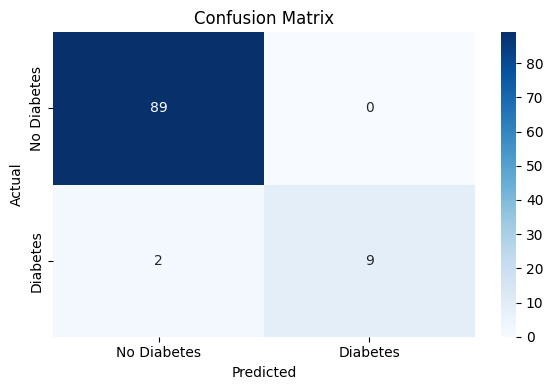

✅ Model saved as 'diabetes_model.pkl'


In [15]:
# model_training.py

import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # ✅ from imblearn

# Load dataset
df = pd.read_csv('diabetes_risk_dataset.csv')
df['Diabetes'] = df['Diabetes'].astype(int)

# Features & target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Column types
numerical = ['Age', 'BMI', 'BloodPressure', 'Glucose']
categorical = ['Gender', 'PhysicalActivity']
binary = ['FamilyHistory', 'PastHighBloodSugar', 'Hypertension',
          'GestationalDiabetes', 'PCOS', 'Smoking', 'Alcohol']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')  # binary columns passed as-is

# Full pipeline with SMOTE + Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),            # ✅ Apply SMOTE after preprocessing
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Metrics
print("\n✅ Model Performance Summary")
print(f"Accuracy:     {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision:    {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall:       {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1 Score:     {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"ROC AUC:      {roc_auc_score(y_test, y_proba) * 100:.2f}%")

print("\n🔍 Classification Report")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(pipeline, 'diabetes_model.pkl')
print("✅ Model saved as 'diabetes_model.pkl'")


In [ ]:
import shap
import numpy as np

# 1. Transform training and test data with the pipeline preprocessor
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# 2. Extract the trained Random Forest model from the pipeline
rf_model = pipeline.named_steps['classifier']

# 3. Create a SHAP TreeExplainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# 4. Calculate SHAP values on the transformed test set
shap_values = explainer.shap_values(X_test_transformed)

# 5. Prepare feature names in the correct order:
# Numerical features
num_features = numerical

# One-hot encoded categorical features
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_names = cat_encoder.get_feature_names_out(categorical)

# Passthrough binary features
passthrough_features = binary

# Combine all feature names as the pipeline output columns
feature_names = list(num_features) + list(cat_names) + list(passthrough_features)

# 6. Check shapes for sanity
print("X_test_transformed shape:", X_test_transformed.shape)
print("shap_values shape:", np.array(shap_values).shape)  # Should be (samples, features, classes)
print("Number of feature names:", len(feature_names))


# 7. Slice SHAP values for positive class (index 1)
shap_class_1 = shap_values[1] if isinstance(shap_values, list) else shap_values[:, :, 1]

# 8. Plot SHAP summary plot for positive class
shap.summary_plot(shap_class_1, X_test_transformed, feature_names=feature_names)

X_test_transformed shape: (100, 14)
shap_values shape: (100, 14, 2)
Number of feature names: 14


DimensionError: Length of features is not equal to the length of shap_values!

In [24]:
# If you loaded your model like this:
model = joblib.load('diabetes_model.pkl')

# Then check the expected input column names:
expected_columns = model.named_steps['preprocessor'].feature_names_in_
print("✅ Model expects these input columns:")
print(expected_columns)


✅ Model expects these input columns:
['Age' 'Gender' 'BMI' 'BloodPressure' 'Glucose' 'FamilyHistory'
 'PastHighBloodSugar' 'Hypertension' 'GestationalDiabetes' 'PCOS'
 'PhysicalActivity' 'Smoking' 'Alcohol']



✅ Model Performance Summary
Accuracy:     99.00%
Precision:    100.00%
Recall:       94.12%
F1 Score:     96.97%
ROC AUC:      100.00%

🔍 Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        83
           1       1.00      0.94      0.97        17

    accuracy                           0.99       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.99      0.99      0.99       100



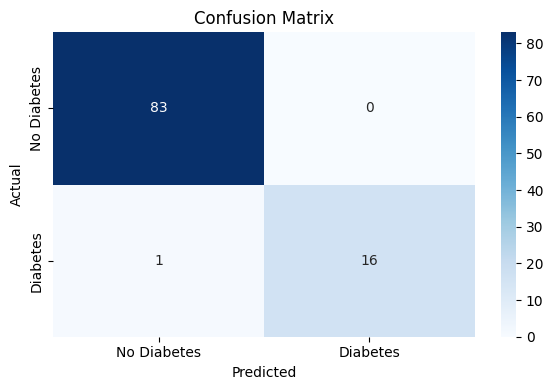


✅ Model saved as 'diabetes_model.pkl'


In [26]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn Pipeline
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('diabetes_risk_dataset.csv')
df['Diabetes'] = df['Diabetes'].astype(int)

# Features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Column types
numerical = ['Age', 'BMI', 'BloodPressure', 'Glucose']
categorical = ['Gender', 'PhysicalActivity']
binary = ['FamilyHistory', 'PastHighBloodSugar', 'Hypertension',
          'GestationalDiabetes', 'PCOS', 'Smoking', 'Alcohol']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')  # Binary columns passed as-is

# Base model
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
calibrated_model = CalibratedClassifierCV(estimator=base_model, method='sigmoid', cv=5)

# Final pipeline using imblearn's Pipeline (to include SMOTE)
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', calibrated_model)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Performance
print("\n✅ Model Performance Summary")
print(f"Accuracy:     {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision:    {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall:       {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1 Score:     {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"ROC AUC:      {roc_auc_score(y_test, y_proba) * 100:.2f}%")

# Classification Report
print("\n🔍 Classification Report")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(pipeline, 'diabetes_model.pkl')
print("\n✅ Model saved as 'diabetes_model.pkl'")
